In [35]:
import numpy as np
import matplotlib.pyplot as plt

9999


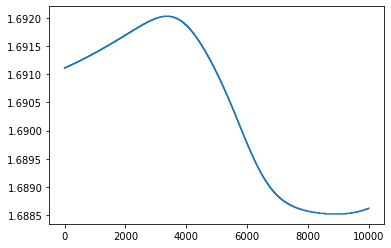

In [36]:
delta_ts, vacf = np.loadtxt("vacf.txt").transpose()
print(len(vacf))
plt.plot(delta_ts, vacf)

In [65]:
f = open('coords/coords_step0000000.dat')
line = f.readline()
N = int(line.split("\n")[0])
print(N)

100


In [66]:
steps0, kinetic0, potential0, total0, avg_collisions0 = np.loadtxt("state_variables.txt").transpose()
delta_ts, vacf = np.loadtxt("vacf.txt").transpose()

In [67]:
# limit = 3
limit = len(steps0)
steps, kinetic, potential, total, avg_collisions = steps0[:limit], kinetic0[:limit], potential0[:limit], total0[:limit], avg_collisions0[:limit]

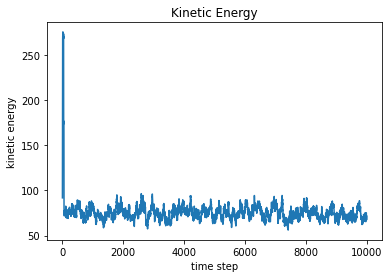

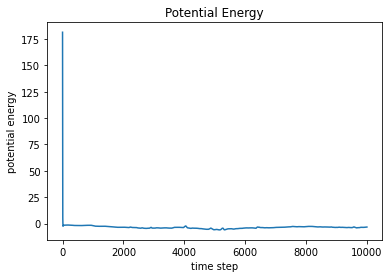

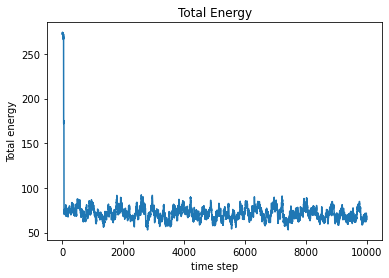

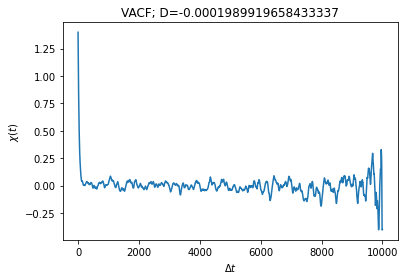

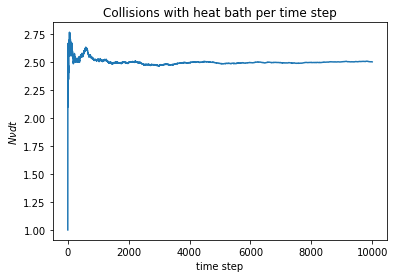

In [71]:
ens = "NVT"
# folder = "good_results/" + ens + "1" + "/"
folder = ""


plt.title('Kinetic Energy')
plt.xlabel('time step')
plt.ylabel('kinetic energy')
plt.plot(steps, kinetic)
plt.savefig(folder + ens + "_kinetic.png", dpi=100)
plt.show()

plt.title('Potential Energy')
plt.xlabel('time step')
plt.ylabel('potential energy')
plt.plot(steps, potential)
plt.savefig(folder + ens + "_potential.png", dpi=100)
plt.show()

plt.title('Total Energy')
plt.xlabel('time step')
plt.ylabel('Total energy')
plt.savefig(folder + ens + "_total.png", dpi=100)
plt.plot(steps, total)
plt.show()

D = round(np.sum(vacf)*0.001/3)
plt.title(f'VACF; D={}')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'$\chi (t)$')
plt.savefig(folder + ens + "_vacf.png", dpi=100)
plt.plot(delta_ts, vacf)
plt.show()

plt.title('Collisions with heat bath per time step')
plt.xlabel('time step')
plt.ylabel(r'$N\nu dt$')
plt.savefig(folder + ens +"_thermostat.png", dpi=100)
plt.plot(steps, avg_collisions)
plt.show()

In [69]:
print(np.sum(vacf)*0.001/3)

-0.0001989919658433337


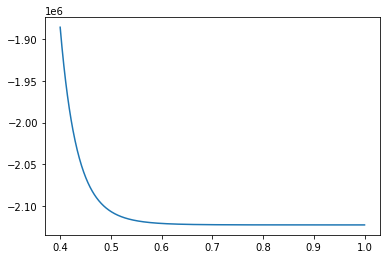

In [95]:
# analyse Lennard-Jones potential energy and force
r_max = 1
r = np.linspace(0.4,r_max,1000)
r_cut = r_max / 3
e_cut = (4/r_cut**6) * ((1/r_cut**6) - 1)
energy = (4/r**6) * ((1/r**6) - 1) - e_cut
plt.plot(r,energy)
# plt.axvline(r_cut)
# plt.xlim(1, r_cut)

Expected std deviation: 1.41421
Obtained std deviation: 1.4166876778038895


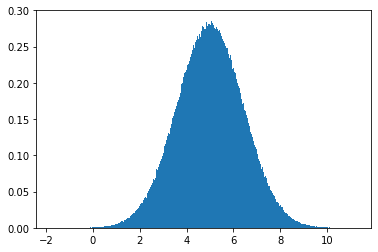

In [25]:
# test boltzmann sample generator
boltz = np.loadtxt("boltzmann.txt")
std_dev = boltz[0]
boltz = boltz[1:]
print(f'Expected std deviation: {std_dev}')
print(f'Obtained std deviation: {np.std(boltz)}')
plt.hist(boltz, density = True, bins = "auto")
plt.show()